<a href="https://colab.research.google.com/github/emailmenojunk/datascience/blob/main/MiniProjectTreesForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [36]:
#laod BC data
df= pd.read_csv('/content/wdbc.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
#split into training and test set
column_names = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.columns = column_names
feature_names=df.drop(['id', 'diagnosis'],axis=1).columns.tolist()
print (feature_names)
target_name='diagnosis'
#split train test
X=feature_names
y=target_name
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)
display(X_train.head())
display(y_train.head())

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


,diagnosis
68,B
181,M
63,B
248,B
60,B


In [24]:
#decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

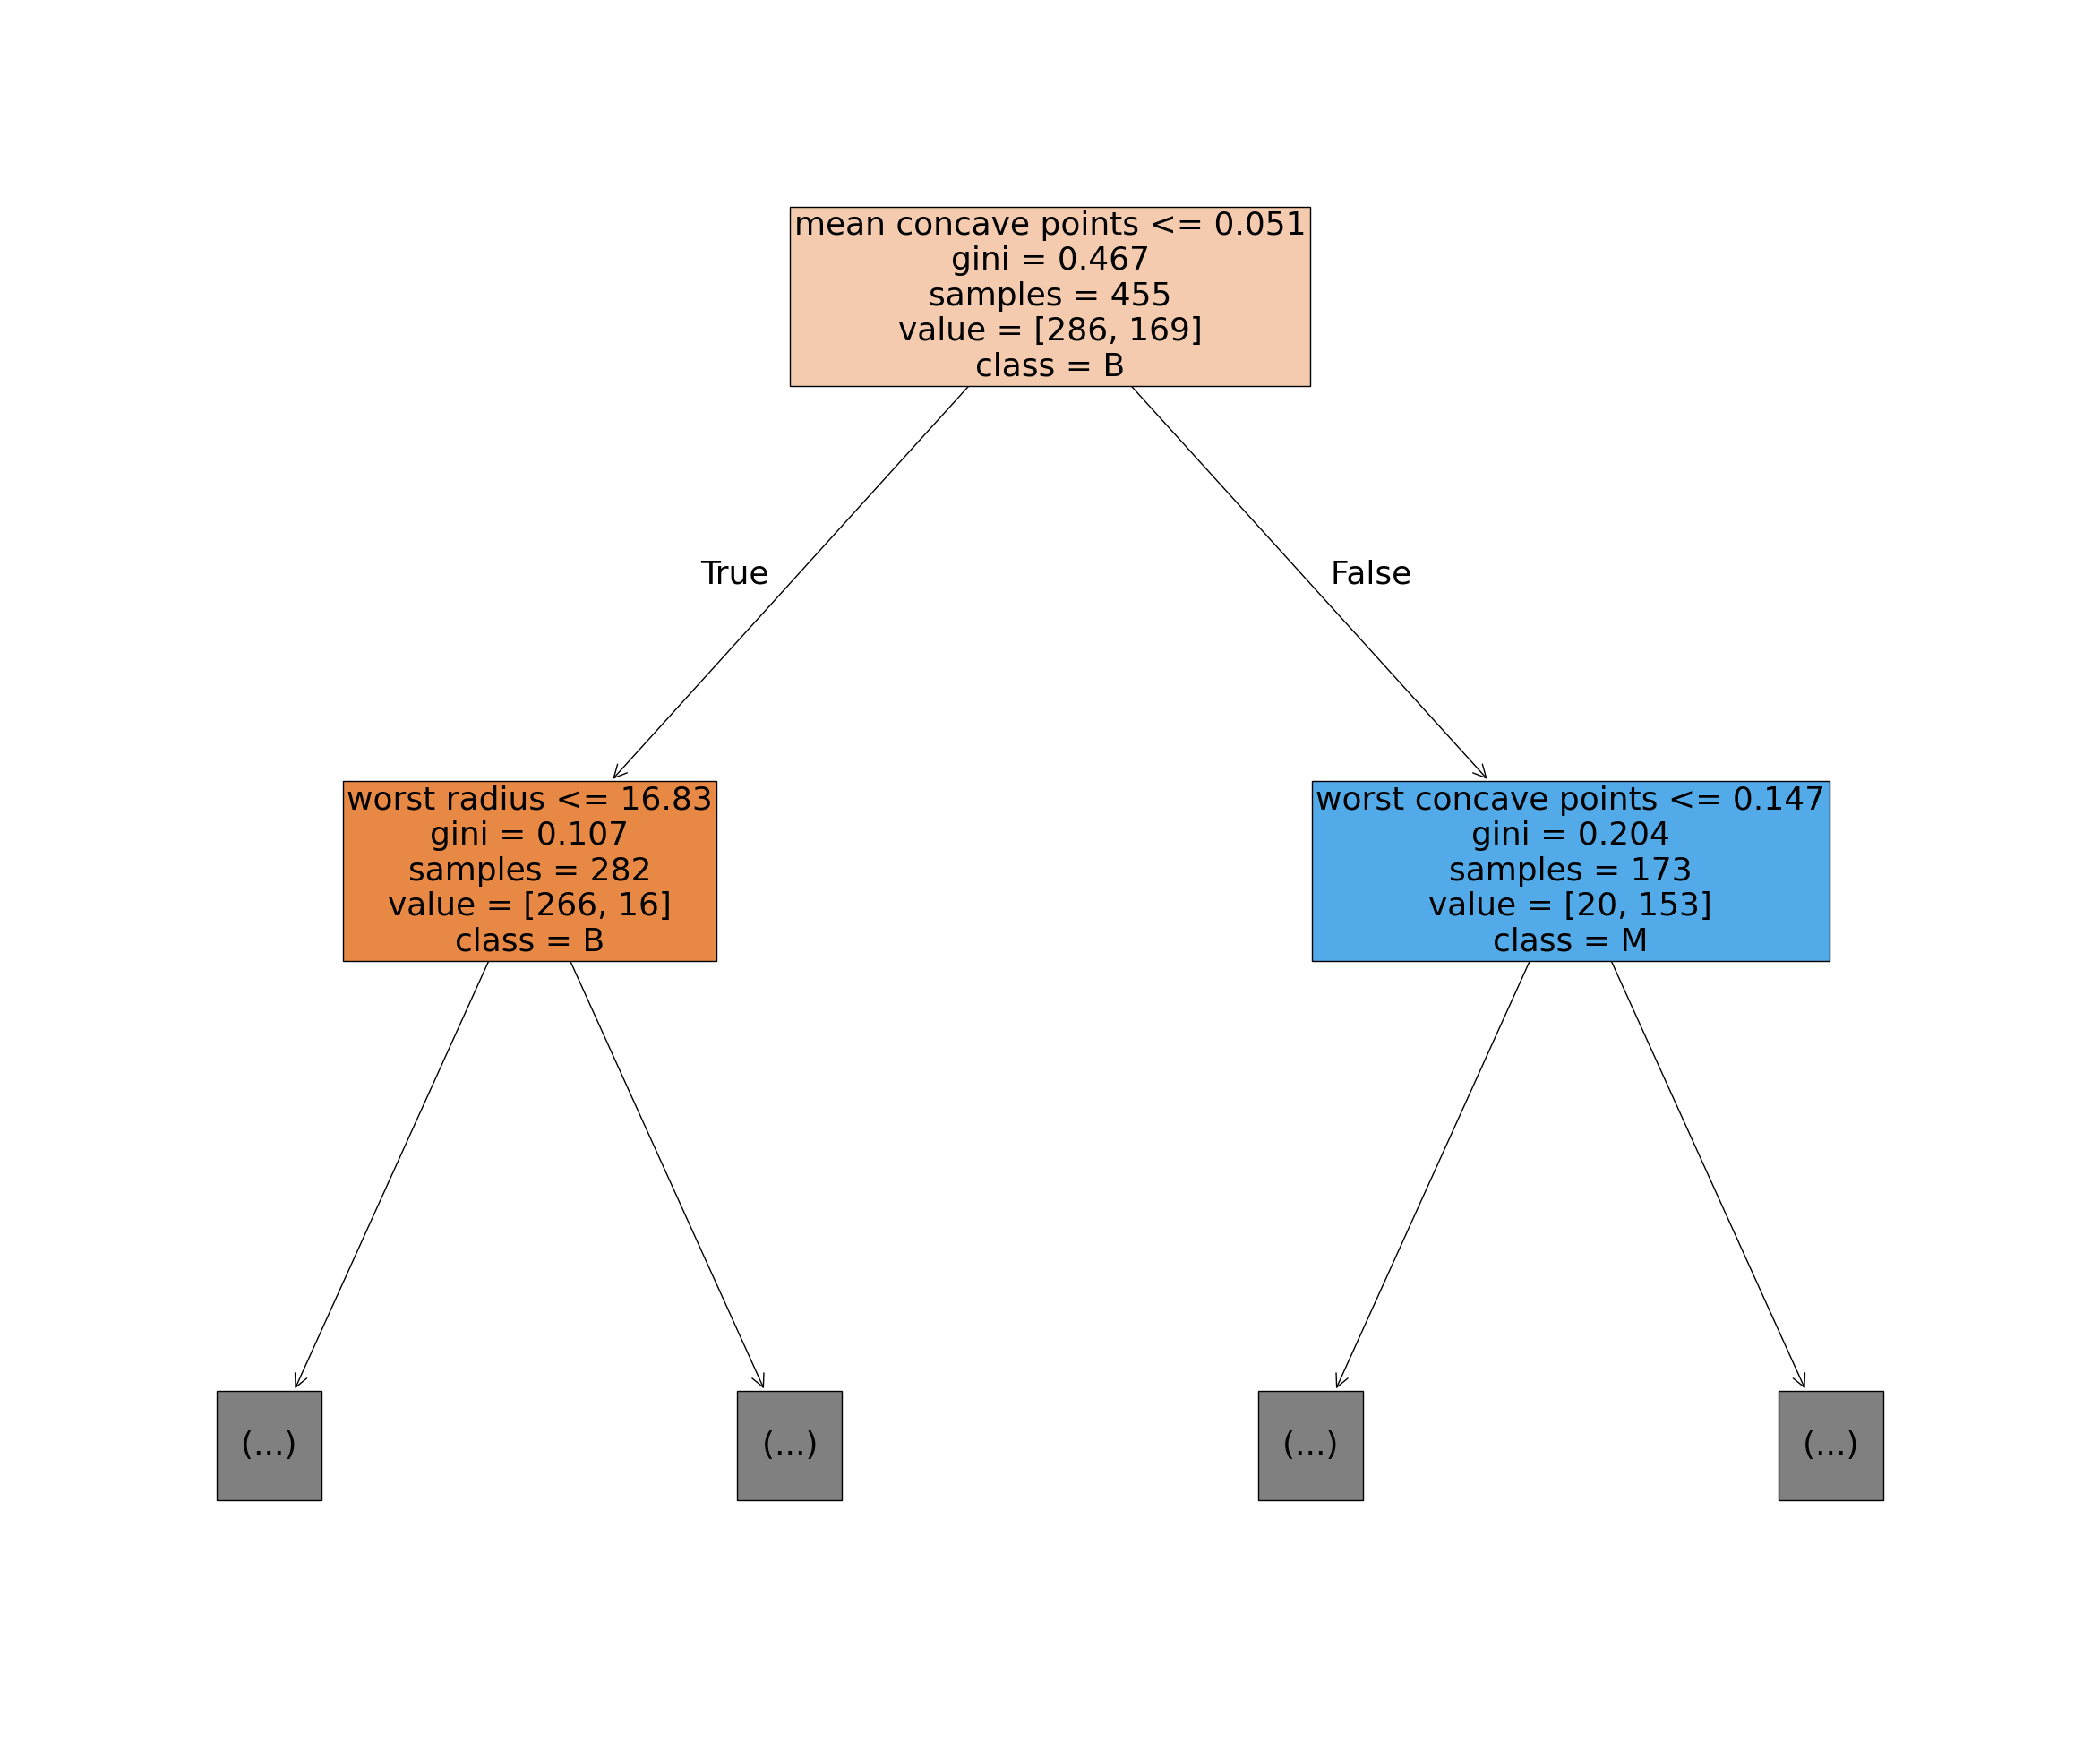

In [41]:
#visualize decision tree
figure = plt.figure(figsize=(30,25))
#make it readable with large fonts
plot_tree(dt_clf, feature_names=X_train.columns, class_names=['B', 'M'], filled=True, max_depth=6) # Limiting depth for readability
plt.rcParams.update({'font.size': 33})
plt.show()

In [39]:
#Random forest modle - train
df_randomforest=RandomForestClassifier(n_estimators=100, random_state=42)
df_randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#extract feature importance & print feature importance
importances = df_randomforest.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
display(feature_importance_df)

In [43]:
#Build and train an AdaBoostClassifier on your training data using a
#decision tree of max depth equal to 1 as your weak learner.
dfAda = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
dfAda.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [45]:
#Evaluate your decision tree, random forest, and AdaBoost models by applying accuracy_score to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.#
#Evaluate Decision Tree
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Evaluate Random Forest
y_pred_rf = df_randomforest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Evaluate AdaBoost
y_pred_ada = dfAda.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")

# Determine the best performing model
best_model = max({"Decision Tree": accuracy_dt, "Random Forest": accuracy_rf, "AdaBoost": accuracy_ada}, key=lambda k: {"Decision Tree": accuracy_dt, "Random Forest": accuracy_rf, "AdaBoost": accuracy_ada}[k])
print(f"\nThe best performing model is: {best_model}")

# You can experiment by changing the hyperparameters of these models in the cells above

Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
AdaBoost Accuracy: 0.9736842105263158

The best performing model is: AdaBoost
